Projet Partie 1

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [4]:
df_artists=pd.read_csv("../Data/artists.csv")
df_tracks=pd.read_csv("../Data/tracks.csv")
df_top200=pd.read_csv("../Data/spotify_top200_global.csv")

In [ ]:
print(df_artists.shape)
print(df_tracks.shape)
print(df_top200.shape)

On a donc:
- Pour artists.csv, 1 162 095 observations avec 5 variables (les colonnes)
- Pour tracks.csv, 586 672 observations avec 20 variables
- Pour top200.csv, 73 200 observations avec 6 variables 

In [12]:
print(df_artists.dtypes)
print(df_tracks.dtypes)
print(df_top200.dtypes)

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object
id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object
Artist     object
Country    object
Date       object
Rank        int64
Streams     int64
Title      object
dtype: object


Question 1:

In [5]:
top10=df_artists.sort_values(by="popularity")
top10=top10[["name","popularity","followers"]].tail(10)
print(top10)

                 name  popularity   followers
115491    Myke Towers          95   5001808.0
144485  Ariana Grande          95  61301006.0
144487       Dua Lipa          95  24123468.0
115490     Juice WRLD          96  16996777.0
144484            BTS          96  31623813.0
144483     The Weeknd          96  31308207.0
115489      Bad Bunny          98  32244734.0
126338   Taylor Swift          98  38869193.0
313676          Drake          98  54416812.0
144481  Justin Bieber         100  44606973.0


In [6]:
top10=top10.sort_values(by="followers", ascending=False)
print(top10)

                 name  popularity   followers
144485  Ariana Grande          95  61301006.0
313676          Drake          98  54416812.0
144481  Justin Bieber         100  44606973.0
126338   Taylor Swift          98  38869193.0
115489      Bad Bunny          98  32244734.0
144484            BTS          96  31623813.0
144483     The Weeknd          96  31308207.0
144487       Dua Lipa          95  24123468.0
115490     Juice WRLD          96  16996777.0
115491    Myke Towers          95   5001808.0


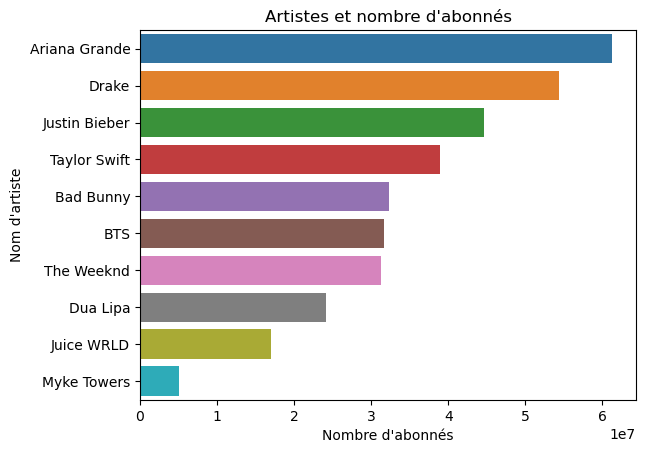

In [17]:
sns.barplot(x="followers", y="name", orient="h", data=top10)
plt.xlabel("Nombre d'abonnés")
plt.ylabel("Nom d'artiste")
plt.title("Artistes et nombre d'abonnés")
plt.show()

Question 2:

In [10]:
df_tracks.head()
df_artists['genres'].tail(20)

1162075                                               []
1162076                                               []
1162077                                               []
1162078                                               []
1162079                                               []
1162080                                 ['black comedy']
1162081                                 ['black comedy']
1162082                                 ['black comedy']
1162083                                 ['black comedy']
1162084                                 ['black comedy']
1162085                    ['deep comedy', 'new comedy']
1162086                    ['deep comedy', 'new comedy']
1162087    ['clean comedy', 'deep comedy', 'new comedy']
1162088                                  ['deep comedy']
1162089                                               []
1162090                                 ['black comedy']
1162091                                               []
1162092                        

In [18]:
df_tracks["release_date"]= pd.to_datetime(df_tracks["release_date"], format="%Y-%m-%d")
df_tracks["years"]= df_tracks["release_date"].dt.strftime("%Y")
print(df_tracks.groupby("years")["id"].nunique())

years
1900        1
1922      294
1923      657
1924      633
1925      903
        ...  
2017     9889
2018    10936
2019    11907
2020    13937
2021     6281
Name: id, Length: 101, dtype: int64

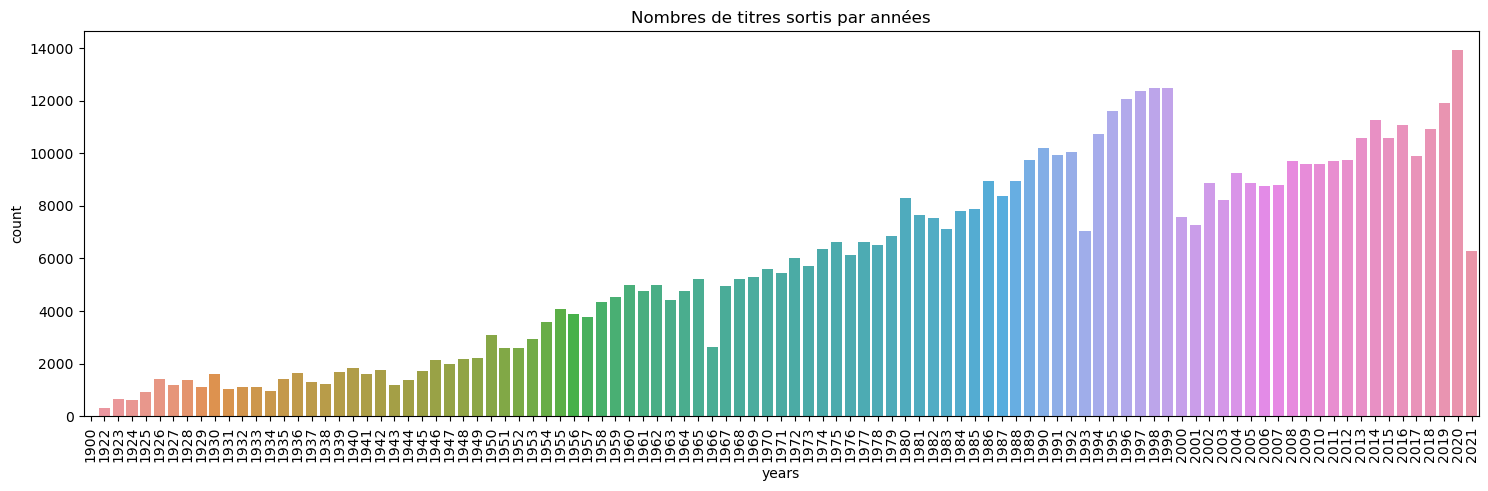

In [26]:
nb_sorties=df_tracks.sort_values(by="years")
fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(x="years", data=nb_sorties)
plt.xticks(rotation=90)
plt.title("Nombres de titres sortis par années")
plt.show()

Question 3:

In [45]:
titres_artistes=df_top200.groupby("Artist").agg({"Title":pd.Series.nunique, "Streams": "sum"})
titres_artistes=titres_artistes.sort_values(by=["Title","Streams"], ascending=False)
top_10_artists = titres_artistes.head(10).reset_index()
top_10_artists

,Artist,Title,Streams
0,Taylor Swift,38,1187762192
1,Lil Uzi Vert,35,681245839
2,BTS,31,1093588891
3,Eminem,28,780198094
4,Juice WRLD,27,2646394526
5,Bad Bunn,27,1613431336
6,Pop Smoke,22,1819047657
7,The Weeknd,21,2584034546
8,Justin Bieber,20,1777000385
9,DaBa,20,1406053145


[]

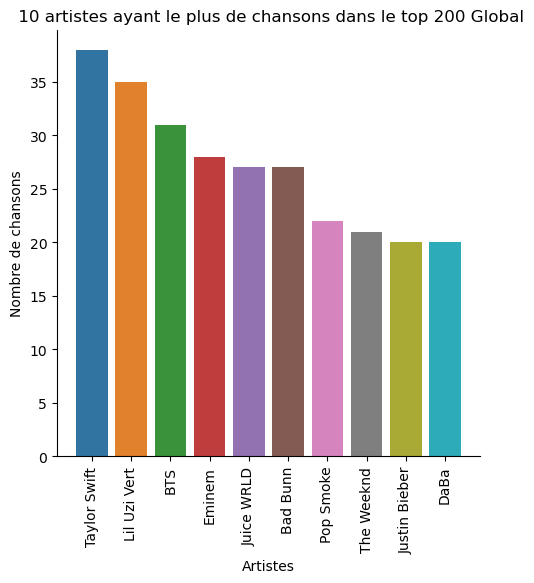

In [46]:
sns.catplot(x="Artist", y="Title", kind="bar", data=top_10_artists)
plt.title(" 10 artistes ayant le plus de chansons dans le top 200 Global")
plt.xlabel("Artistes")
plt.ylabel("Nombre de chansons")
plt.xticks(rotation=90) 
plt.plot()

Question 4:

<Axes: >

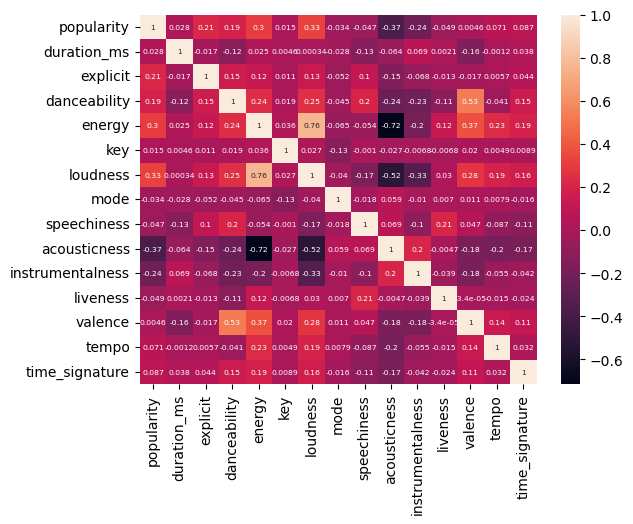

In [48]:
corr_in_tracks=df_tracks.corr(numeric_only=True)
sns.heatmap(corr_in_tracks, annot=True, annot_kws = {'fontsize': 5.5})